In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import wandb
import sys
import json
import os
sys.path.insert(1, '..')
from main_code.utils.visualization.tsp_plotter import TSP_plotter
from main_code.utils.wandb.wandb_api import get_table_data_from_url, get_data_for_run
from main_code.utils.data.data_sets import DiskTSPTestSet
from main_code.utils.data.utils import convert_tsp_to_nx, calc_tour_length

In [4]:
# load data from wandb
api = wandb.Api()
# https://docs.wandb.ai/ref/python/public-api/run#files
run = api.run("dschaub/rltsp/m9jl4ks4")
run_data = get_data_for_run(run)
metrics_df = run_data["run_metrics"]
tour_df = run_data["tour_data"]

In [5]:
tour_array = tour_df.to_numpy()
metrics_array = metrics_df.to_numpy()

In [63]:
dataset_path = "../data/test_sets/fu_et_al_n_20_10000"
dataset =  DiskTSPTestSet(dataset_path, use_pomo_aug=False, sampling_steps=1)

In [134]:
# find instances where the pred len is way smaller than the opt len
for idx, data in enumerate(dataset):
    node_coords = data[0].astype(np.float64)
    opt_len = data[1]
    opt_tour = data[2]
    pred_tour = tour_array[:, idx]
    pred_len = calc_tour_length(node_coords, pred_tour)
    if pred_len < opt_len - 0.01:
        print(idx)

1526
1554
1954
2025
2357
2581
3566
3656
5998
7993
8255


In [145]:
# load test set data
# specifically the optimal solutions
idx = 7993
data = dataset[idx]
node_coords = data[0].astype(np.float64)
opt_len = data[1]
opt_tour = data[2]
pred_tour = tour_array[:, idx]
pred_len = calc_tour_length(node_coords, pred_tour)

In [146]:
print(calc_tour_length(node_coords, opt_tour))
print(calc_tour_length(node_coords, pred_tour))

3.9557506285938846
3.9454455520721576


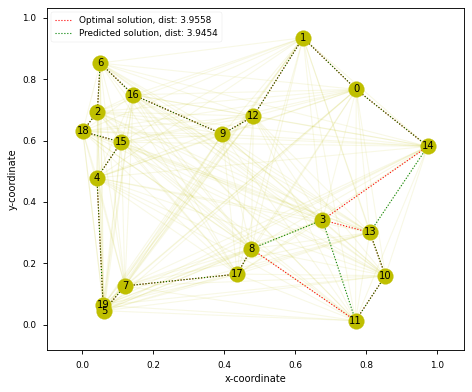

In [147]:
# visualize tour and TSP
g = convert_tsp_to_nx(node_coords)
plotter = TSP_plotter()
fig = plotter.plot_nx_graph(
    g, 
    opt_solution=opt_tour,
    opt_len=opt_len,
    pred_solution=pred_tour,
    pred_len=pred_len, 
    edge_probs=None, 
    only_draw_relevant_edges=False, 
    save_path=None, 
    dpi=80)

In [148]:
fig.savefig(f"../results/plots/tsp20_tour_idx_{idx}.png", dpi=300)